In [3]:
"""
trends-1.upward
    2.downward
    3.horizontal/stationary

seasonility-repeating trends
cyclical-trends with no set repeation

    """

'\ntrends-1.upward\n    2.downward\n    3.horizontal/stationary\n\nseasonility-repeating trends\ncyclical-trends with no set repeation\n\n    '

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df=pd.read_csv('tser_lec/Data/macrodata.csv',index_col=0,parse_dates=True)

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


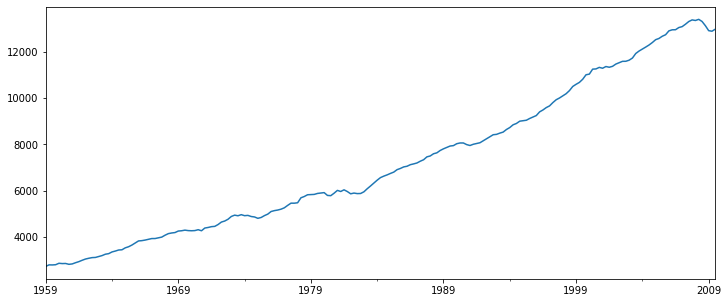

In [7]:
df['realgdp'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [9]:
gdp_cycle,gdp_trend=hpfilter(df['realgdp'],lamb=1600)

In [10]:
type(gdp_trend)

pandas.core.series.Series

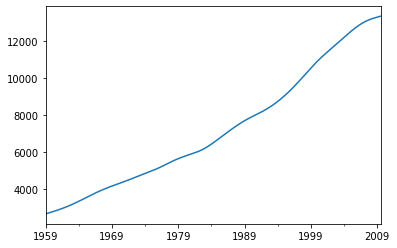

In [11]:
gdp_trend.plot()

In [12]:
df['trend']=gdp_trend

In [13]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,13222.581545
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073


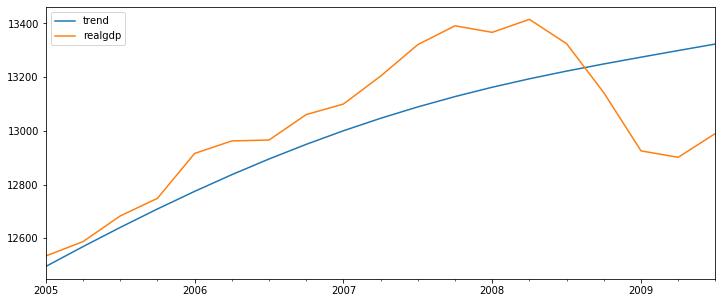

In [15]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [16]:
#ets(errors trends and seasonlity) models
#.exponentials smoothing
#.trend methods model
#.ets decomposition
"""stats model provides seasonal decompostion tool we can use to saparate the differeent components

time series decompostion with ets
visualizing the data based off its ets is a good way to understand behaviour.

liner trend
exponential trend

ETS:
observed plot
trend plot-liner/exponential downward/upward
seasonal plot-upward/downward or both(repeation)
residual plot-error

2 types ETS model:
1.additive-more linerar ,seasonility  and trend constant overtime 
2.multiplicative-non-linerar , seasonility  and trend changes overtime 
"""


'stats model provides seasonal decompostion tool we can use to saparate the differeent components\n\ntime series decompostion with ets\nvisualizing the data based off its ets is a good way to understand behaviour.\n\nliner trend\nexponential trend\n\nETS:\nobserved plot\ntrend plot-liner/exponential downward/upward\nseasonal plot-upward/downward or both(repeation)\nresidual plot-error\n\n2 types ETS model:\n1.additive-more linerar ,seasonility  and trend constant overtime \n2.multiplicative-non-linerar , seasonility  and trend changes overtime \n'

In [17]:
df=pd.read_csv('tser_lec/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [18]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df=df.dropna()

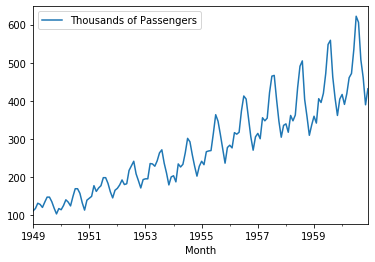

In [20]:
df.plot()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result=seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')

In [29]:
result.trend
#result.seasonal
#result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: Thousands of Passengers, Length: 144, dtype: float64

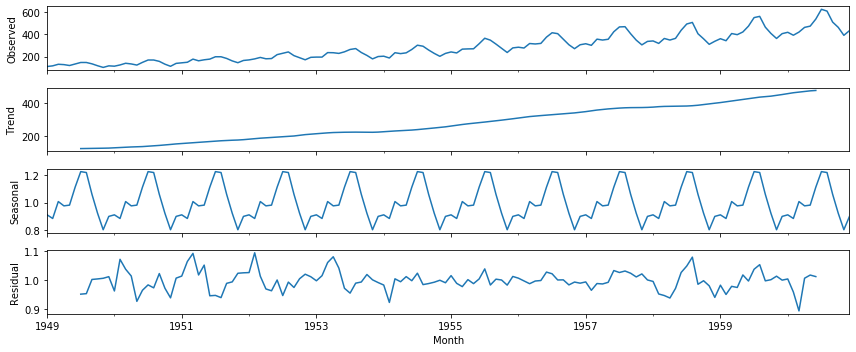

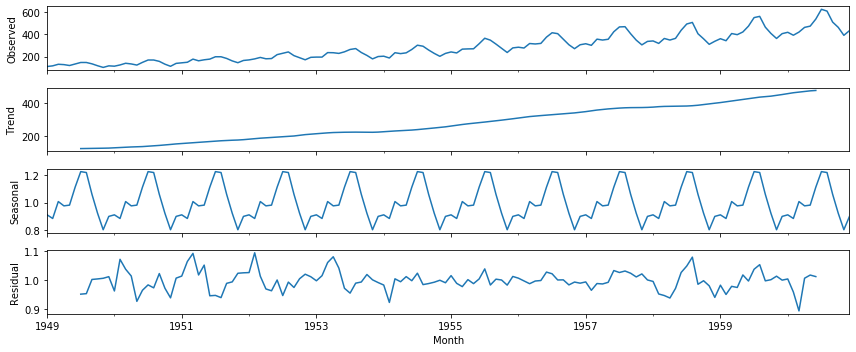

In [31]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
result.plot()

In [32]:
#EWMA MODEL(EXPONENTIAL WEIGHTED MOVING AVERAGE MODEL)...
"""
EWMA helps to exapnd SMA(simple moving average)
issue SMA-entire model will constrained to same window size
single window size
 if more weighted  data need-use EWMA insted of SMA
SMA-describe general tends in data but not predict future trend data
 to fix this 
 
 we use EWMA
"""

'\nEWMA helps to exapnd SMA(simple moving average)\nissue SMA-entire model will constrained to same window size\nsingle window size\n if more weighted  data need-use EWMA insted of SMA\nSMA-describe general tends in data but not predict future trend data\n to fix this \n \n we use EWMA\n'

In [33]:
df=pd.read_csv('tser_lec/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [37]:
df.dropna(inplace=True)

In [38]:
df.index=pd.to_datetime(df.index)

In [39]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [42]:
df['6-month-SMA']=df['Thousands of Passengers'].rolling(window=6).mean()

In [43]:
df['12-month-SMA']=df['Thousands of Passengers'].rolling(window=12).mean()

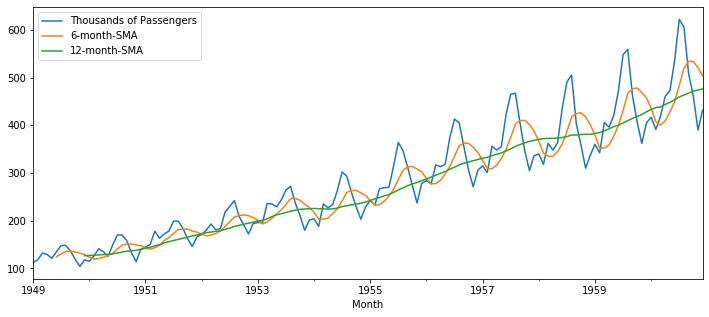

In [45]:
df.plot()

In [48]:
#EWMA
df['EWMA-12']=df['Thousands of Passengers'].ewm(span=12).mean()

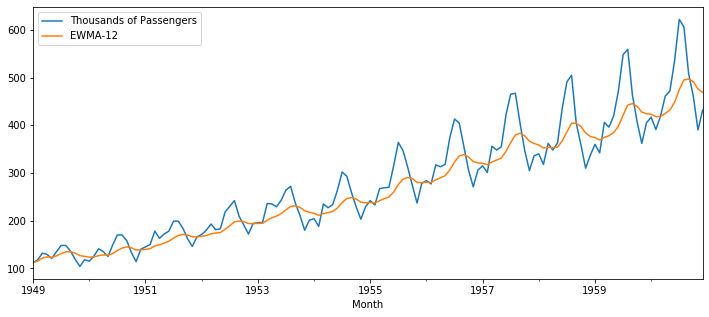

In [51]:
df[['Thousands of Passengers','EWMA-12']].plot()

In [52]:
#HOLTS WINTER METHODS
"""
EWMA failed to smoothing trend and seasonility

it is a double exponential smoothing method
it comprices forecast equation
and three equation
1.label
2.trend
3.seasonal
smoothing parameter(alpha,bita,gama)

 HOLTS for ets:
additive:when seasonal  variation are constant
multiplicative:wnen seasonal variation changing proportional to label

.single exponential smoothing:
-EWMA
predict-
label
.double exponential smoothing:
(HOLTS method)
predict-
label 
trend
.triple exponential smoothing:
(HOLTS WINER METHHOD)
predict-
label(alpha)
trend(beta)
seasonility(gama)
L=no of division per cycle
"""

'\nEWMA failed to smoothing trend and seasonility\n\nit is a double exponential smoothing method\nit comprices forecast equation\nand three equation\n1.label\n2.trend\n3.seasonal\nsmoothing parameter(alpha,bita,gama)\n\n HOLTS for ets:\nadditive:when seasonal  variation are constant\nmultiplicative:wnen seasonal variation changing proportional to label\n\n.single exponential smoothing:\n-EWMA\npredict-\nlabel\n.double exponential smoothing:\n(HOLTS method)\npredict-\nlabel \ntrend\n.triple exponential smoothing:\n(HOLTS WINER METHHOD)\npredict-\nlabel(alpha)\ntrend(beta)\nseasonility(gama)\nL=no of division per cycle\n'

In [53]:
#HOLTS WINTER METHOD
#simple exponentials smoothing
df=pd.read_csv('tser_lec/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [54]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [55]:
df=df.dropna()

In [57]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [58]:
df.index.freq='MS'

In [59]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [60]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [63]:
span=12
alpha=2/(span+1)

In [64]:
#using EWMA
df['EWMA']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [65]:
df.head()

,Thousands of Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [66]:
#using stats model
model=SimpleExpSmoothing(df['Thousands of Passengers'])

In [69]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [73]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [76]:
df.head()

,Thousands of Passengers,EWMA,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [79]:
#double exponential smoothing
#holts methos:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [89]:
df['DES_MUL_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [90]:
df.head()

,Thousands of Passengers,EWMA,SES12,DES_ADD_12,DES_MUL_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237762,112.049247
1949-02-01,118,112.923077,112.923077,120.237762,118.051885
1949-03-01,132,115.857988,115.857988,134.237762,132.058041
1949-04-01,129,117.879836,117.879836,131.237762,129.056722
1949-05-01,121,118.359861,118.359861,123.237762,121.053204


In [91]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES12', 'DES_ADD_12', 'DES_MUL_12'], dtype='object')

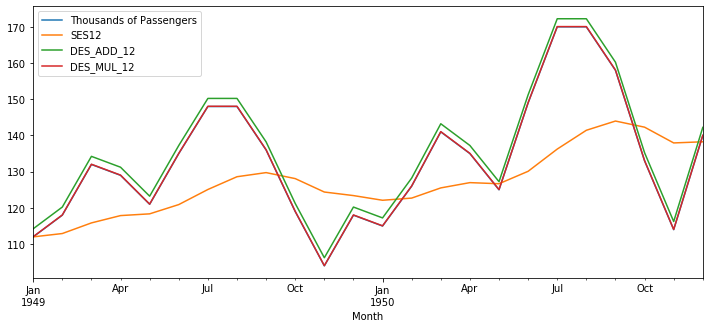

In [96]:
df[['Thousands of Passengers', 'SES12', 'DES_ADD_12','DES_MUL_12']].iloc[:24].plot(figsize=(12,5))

In [97]:
#triple exponential smoothing
df['TES_MUL_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

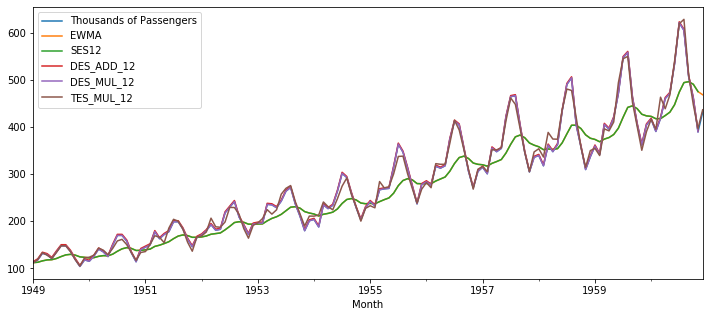

In [98]:
df.plot()

In [99]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES12', 'DES_ADD_12', 'DES_MUL_12',
       'TES_MUL_12'],
      dtype='object')

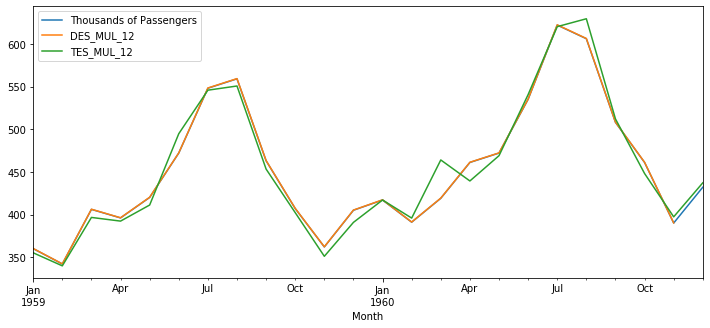

In [102]:
df[['Thousands of Passengers','DES_MUL_12',
       'TES_MUL_12']].iloc[-24:].plot()

In [ ]:
#exercise